# Fraction of Total Deposition in Airways of Given Diameter


This examples creates a histogram showing the fraction of airway wall aerosol deposition in airways of given diameter. It demonstrates how to link information between airway tree's structure `*_AirwayTreeTable.csv` and 
the airway tree segment's particle deposition `*_AirwaySegmentsDeposition*`.

We utilize `pandas` for loading the csv files and `matplotlib` for visualization of data. 

In [1]:
import os, pandas, matplotlib, numpy
import matplotlib.pyplot as plt

First, we download example data from the `lapdMouse` data archive, which can then be loaded with `pandas`.

In [2]:
from lapdMouseUtils import DBUtil
db=DBUtil()
db.downloadFile('m01/m01_AirwayTreeTable.csv')
db.downloadFile('m01/m01_AirwaySegmentsDeposition.csv')

In [3]:
df_att = pandas.read_csv('m01/m01_AirwayTreeTable.csv', index_col='label')
df_att.head()

,parent,length,radius,name,centroidX,centroidY,centroidZ,directionX,directionY,directionZ
label,,,,,,,,,,
1,0,3.85790,0.633658,Trachea,15.6271,12.4944,21.1153,-0.063817,0.108764,-0.992017
2,1,5.89578,0.621015,LMB,16.1652,13.0142,16.3458,0.224296,0.105177,-0.968829
3,1,3.42378,0.853296,RMB,14.9932,13.2012,17.6453,-0.298354,0.290323,-0.909229
4,2,1.47990,0.466713,NaN,17.4922,13.0142,13.3994,0.899723,-0.419015,-0.122171
5,2,1.67248,0.803769,LMB,17.0271,13.4337,12.6854,0.239942,0.130883,-0.961924


In [4]:
df_asd = pandas.read_csv('m01/m01_AirwaySegmentsDeposition.csv', index_col='label')
df_asd.head()

,area,mean,sigma,median,min,max,count,centroidX,centroidY,centroidZ,bboxXStart,bboxXEnd,bboxYStart,bboxYEnd,bboxZStart,bboxZEnd
label,,,,,,,,,,,,,,,,
1,17.22960,31.4931,194.521,11.2213,-0.000478,6530.83,4423,15.8234,12.4146,21.0647,14.5986,16.8049,11.2997,13.6001,19.1502,23.0699
2,24.96780,58.1681,313.559,16.2758,-0.006646,18118.80,6115,16.3150,13.1261,15.8510,15.4892,17.8496,11.9995,14.2744,13.2214,19.3063
3,24.40730,113.5010,1008.220,16.3208,-0.785225,56750.20,6442,14.7392,13.3140,17.4631,13.3377,16.2626,11.9451,14.7662,15.3042,23.0444
4,2.52382,131.5260,448.014,63.8535,0.002663,9874.51,712,17.8451,12.6914,13.4499,17.2078,18.5382,12.2484,13.2597,12.8324,14.1438
5,10.61550,107.4380,333.021,57.1003,0.005451,15349.60,2892,17.0132,13.4307,12.4336,15.9737,18.1046,12.4184,14.3298,11.2289,13.4835


For each airway segment in  `*_AirwaySegmentsDeposition*`, we calculate the total deposition in the segment `total=area*mean` and look up it's `radius` from `*_AirwayTreeTable.csv`. The airway segments in `*_AirwaySegmentsDeposition*` and `*_AirwayTreeTable.csv` share a common label. But please note that some airway segments present in `*_AirwayTreeTable.csv` may not have any assigned surface area and therefore no entry in table`*_AirwaySegmentsDeposition*`.

In [5]:
df = df_asd.loc[:,['area','mean']]
df['total'] = df['area']*df['mean']
df['radius'] = df_att.loc[df.index,'radius']
df.head()

,area,mean,total,radius
label,,,,
1,17.22960,31.4931,542.613516,0.633658
2,24.96780,58.1681,1452.329487,0.621015
3,24.40730,113.5010,2770.252957,0.853296
4,2.52382,131.5260,331.947949,0.466713
5,10.61550,107.4380,1140.508089,0.803769


We create a set of radius bins for our histogram and calculate the cummulative `deposition` and `surface_area` of all airways in the given bins.

In [6]:
bin_width = 0.025
radius_bins = [x*bin_width for x in range(40)]
n = len(radius_bins)
radius_bin = numpy.digitize(df['radius'].values, radius_bins)-1
deposition = numpy.empty(n)
surface_area = numpy.empty(n)
for i in range(n):
    deposition[i] = sum(df.loc[radius_bin==i,'total'])
    surface_area[i]= sum(df.loc[radius_bin==i,'area'])

Finally, we plot the fraction of total deposition in airways of given radius.

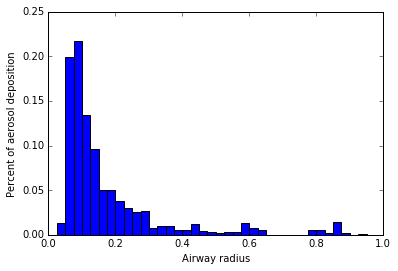

In [7]:
plt.bar(radius_bins,deposition/sum(deposition),bin_width,align='edge')
plt.xlabel('Airway radius')
plt.ylabel('Percent of aerosol deposition');

For comparison, we also plot the fraction of airway surface area in airways of given radius

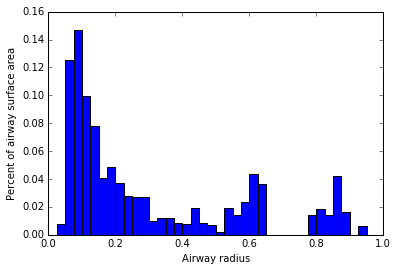

In [8]:
plt.bar(radius_bins,surface_area/sum(surface_area),bin_width,align='edge')
plt.xlabel('Airway radius')
plt.ylabel('Percent of airway surface area');